In [25]:
import json
import pandas as pd
import os
import numpy as np
import requests
from dotenv import load_dotenv
import pathlib as path

In [26]:
load_dotenv()
api_key = os.getenv("CENSUS_API_KEY")

In [27]:
#2022 County Populations:

state2022_url = f'https://api.census.gov/data/2022/acs/acs1?get=NAME,B01003_001E,GEO_ID&for=county:*&in=state:*'
state2022_query = requests.get(state2022_url).json()
json.dumps(state2022_query, indent=4)

'[\n    [\n        "NAME",\n        "B01003_001E",\n        "GEO_ID",\n        "state",\n        "county"\n    ],\n    [\n        "Baldwin County, Alabama",\n        "246435",\n        "0500000US01003",\n        "01",\n        "003"\n    ],\n    [\n        "Calhoun County, Alabama",\n        "115788",\n        "0500000US01015",\n        "01",\n        "015"\n    ],\n    [\n        "Cullman County, Alabama",\n        "90665",\n        "0500000US01043",\n        "01",\n        "043"\n    ],\n    [\n        "DeKalb County, Alabama",\n        "71998",\n        "0500000US01049",\n        "01",\n        "049"\n    ],\n    [\n        "Elmore County, Alabama",\n        "89563",\n        "0500000US01051",\n        "01",\n        "051"\n    ],\n    [\n        "Etowah County, Alabama",\n        "103088",\n        "0500000US01055",\n        "01",\n        "055"\n    ],\n    [\n        "Houston County, Alabama",\n        "108079",\n        "0500000US01069",\n        "01",\n        "069"\n    ],\n  

In [28]:
state_pop2022_df = pd.DataFrame(state2022_query)
state_pop2022_df.head()

state_pop2022_df.columns = state_pop2022_df.iloc[0]
state_pop2022_df = state_pop2022_df[1:]
state_pop2022_df.reset_index(drop=True, inplace=True)

state_pop2022_df.head()
state_pop2022_df2 = state_pop2022_df.rename(columns={"NAME": "County", "B01003_001E": "Population", "state": "State Code", "county": "County Code"})
state_pop2022_df3 = state_pop2022_df2[['County', 'Population', 'State Code', 'County Code', 'GEO_ID']]
state_pop2022_df3.sort_values("State Code")
#query_df.describe()

,County,Population,State Code,County Code,GEO_ID
0,"Baldwin County, Alabama",246435,01,003,0500000US01003
19,"Tuscaloosa County, Alabama",236780,01,125,0500000US01125
18,"Talladega County, Alabama",80704,01,121,0500000US01121
17,"Shelby County, Alabama",230115,01,117,0500000US01117
16,"St. Clair County, Alabama",93932,01,115,0500000US01115
...,...,...,...,...,...
843,"Ponce Municipio, Puerto Rico",132138,72,113,0500000US72113
844,"San Juan Municipio, Puerto Rico",334776,72,127,0500000US72127
845,"Toa Alta Municipio, Puerto Rico",66041,72,135,0500000US72135
846,"Toa Baja Municipio, Puerto Rico",72783,72,137,0500000US72137


In [29]:
#2021 County Populations:

state2021_url = f'https://api.census.gov/data/2021/acs/acs1?get=NAME,B01003_001E,GEO_ID&for=county:*&in=state:*'
state2021_query = requests.get(state2021_url).json()
#print(json.dumps(state2019_query, indent=4))



In [30]:
state_pop2021_df = pd.DataFrame(state2021_query)
state_pop2021_df.head()

state_pop2021_df.columns = state_pop2021_df.iloc[0]
state_pop2021_df = state_pop2021_df[1:]
state_pop2021_df.reset_index(drop=True, inplace=True)

state_pop2021_df.head()
state_pop2021_df2 = state_pop2021_df.rename(columns={"NAME": "County", "B01003_001E": "Population", "state": "State Code", "county": "County Code"})
state_pop2021_df2.sort_values("State Code")
state_pop2021_df3=state_pop2021_df2[['County', 'Population', 'State Code', 'County Code', 'GEO_ID']]
state_pop2021_df3
#query_df.describe()

,County,Population,State Code,County Code,GEO_ID
0,"Baldwin County, Alabama",239294,01,003,0500000US01003
1,"Calhoun County, Alabama",115972,01,015,0500000US01015
2,"Cullman County, Alabama",89496,01,043,0500000US01043
3,"DeKalb County, Alabama",71813,01,049,0500000US01049
4,"Elmore County, Alabama",89304,01,051,0500000US01051
...,...,...,...,...,...
836,"Ponce Municipio, Puerto Rico",135084,72,113,0500000US72113
837,"San Juan Municipio, Puerto Rico",337300,72,127,0500000US72127
838,"Toa Alta Municipio, Puerto Rico",67569,72,135,0500000US72135
839,"Toa Baja Municipio, Puerto Rico",74368,72,137,0500000US72137


In [31]:
#2020 County Populations

county2020_query_url = f'https://api.census.gov/data/2020/dec/pl?get=NAME,P1_001N,GEO_ID&for=county:*&in=state:*'

query = requests.get(county2020_query_url).json()
#print(json.dumps(query, indent=4))

In [32]:
county2020_query_df = pd.DataFrame(query)
county2020_query_df
#column rename

county2020_query_df.columns = county2020_query_df.iloc[0]
county2020_query_df = county2020_query_df[1:]
county2020_query_df.reset_index(drop=True, inplace=True)
county2020_query_df

county2020_query_df2 = county2020_query_df.rename(columns={"NAME": "County", "P1_001N": "Population", "state": "State Code", "county": "County Code"})
county2020_query_df2.sort_values("State Code")
county2020_query_df3 = county2020_query_df2[['County', 'Population', 'State Code', 'County Code', 'GEO_ID']]
county2020_query_df3



,County,Population,State Code,County Code,GEO_ID
0,"Autauga County, Alabama",58805,01,001,0500000US01001
1,"Baldwin County, Alabama",231767,01,003,0500000US01003
2,"Barbour County, Alabama",25223,01,005,0500000US01005
3,"Bibb County, Alabama",22293,01,007,0500000US01007
4,"Blount County, Alabama",59134,01,009,0500000US01009
...,...,...,...,...,...
3216,"Renville County, Minnesota",14723,27,129,0500000US27129
3217,"Roseau County, Minnesota",15331,27,135,0500000US27135
3218,"Sherburne County, Minnesota",97183,27,141,0500000US27141
3219,"Steele County, Minnesota",37406,27,147,0500000US27147


In [33]:
#2019 County Populations:

state2019_url = f'https://api.census.gov/data/2019/acs/acs1?get=NAME,B01003_001E,GEO_ID&for=county:*&in=state:*'
state2019_query = requests.get(state2019_url).json()
#print(json.dumps(state2019_query, indent=4))

In [34]:
state_pop2019_df = pd.DataFrame(state2019_query)
state_pop2019_df.head()

state_pop2019_df.columns = state_pop2019_df.iloc[0]
state_pop2019_df = state_pop2019_df[1:]
state_pop2019_df.reset_index(drop=True, inplace=True)
state_pop2019_df

state_pop2019_df2 = state_pop2019_df.rename(columns={"NAME": "County", "B01003_001E": "Population", "state": "State Code", "county": "County Code"})
state_pop2019_df2.sort_values("State Code").head(10)
state_pop2019_df3 = state_pop2019_df2[['County', 'Population', 'State Code', 'County Code', 'GEO_ID']]
state_pop2019_df3
#query_df.describe()

,County,Population,State Code,County Code,GEO_ID
0,"Baldwin County, Alabama",223234,01,003,0500000US01003
1,"Calhoun County, Alabama",113605,01,015,0500000US01015
2,"Cullman County, Alabama",83768,01,043,0500000US01043
3,"DeKalb County, Alabama",71513,01,049,0500000US01049
4,"Elmore County, Alabama",81209,01,051,0500000US01051
...,...,...,...,...,...
835,"Ponce Municipio, Puerto Rico",131881,72,113,0500000US72113
836,"San Juan Municipio, Puerto Rico",318441,72,127,0500000US72127
837,"Toa Alta Municipio, Puerto Rico",72025,72,135,0500000US72135
838,"Toa Baja Municipio, Puerto Rico",74271,72,137,0500000US72137


In [35]:
#2018 County Populations:

state2018_url = f'https://api.census.gov/data/2018/acs/acs1?get=NAME,B01003_001E,GEO_ID&for=county:*&in=state:*'

state2018_query = requests.get(state2018_url).json()
#print(json.dumps(state2020_query, indent=4))

In [36]:
state_pop2018_df = pd.DataFrame(state2018_query)
state_pop2018_df.head()

state_pop2018_df.columns = state_pop2018_df.iloc[0]
state_pop2018_df = state_pop2018_df[1:]
state_pop2018_df.reset_index(drop=True, inplace=True)
state_pop2018_df

state_pop2018_df2 = state_pop2018_df.rename(columns={"NAME": "County", "B01003_001E": "Population", "state": "State Code", "county": "County Code"})
state_pop2018_df2.sort_values("State Code")
state_pop2018_df3 = state_pop2018_df2[['County', 'Population', 'State Code', 'County Code', 'GEO_ID']]
state_pop2018_df3
#query_df.describe()

,County,Population,State Code,County Code,GEO_ID
0,"Baldwin County, Alabama",218022,01,003,0500000US01003
1,"Calhoun County, Alabama",114277,01,015,0500000US01015
2,"Cullman County, Alabama",83442,01,043,0500000US01043
3,"DeKalb County, Alabama",71385,01,049,0500000US01049
4,"Elmore County, Alabama",81887,01,051,0500000US01051
...,...,...,...,...,...
833,"Ponce Municipio, Puerto Rico",133191,72,113,0500000US72113
834,"San Juan Municipio, Puerto Rico",320967,72,127,0500000US72127
835,"Toa Alta Municipio, Puerto Rico",71094,72,135,0500000US72135
836,"Toa Baja Municipio, Puerto Rico",74623,72,137,0500000US72137


In [37]:
#2017 County Populations:

state2017_url = f'https://api.census.gov/data/2017/acs/acs1?get=NAME,B01003_001E,GEO_ID&for=county:*&in=state:*'

state2017_query = requests.get(state2017_url).json()
#print(json.dumps(state2017_query, indent=4))

In [38]:
state_pop2017_df = pd.DataFrame(state2017_query)
state_pop2017_df.head()

state_pop2017_df.columns = state_pop2017_df.iloc[0]
state_pop2017_df = state_pop2017_df[1:]
state_pop2017_df.reset_index(drop=True, inplace=True)
state_pop2017_df

state_pop2017_df2 = state_pop2017_df.rename(columns={"NAME": "County", "B01003_001E": "Population", "state": "State Code", "county": "County Code"})
state_pop2017_df3 = state_pop2017_df2[['County', 'Population', 'State Code', 'County Code', 'GEO_ID']]
state_pop2017_df3.sort_values("State Code")

#query_df.describe()

,County,Population,State Code,County Code,GEO_ID
363,"Baldwin County, Alabama",212628,01,003,0500000US01003
383,"Walker County, Alabama",64058,01,127,0500000US01127
382,"Tuscaloosa County, Alabama",207811,01,125,0500000US01125
381,"Talladega County, Alabama",80065,01,121,0500000US01121
380,"Shelby County, Alabama",213605,01,117,0500000US01117
...,...,...,...,...,...
358,"Ponce Municipio, Puerto Rico",140859,72,113,0500000US72113
359,"San Juan Municipio, Puerto Rico",337288,72,127,0500000US72127
360,"Toa Alta Municipio, Puerto Rico",73217,72,135,0500000US72135
361,"Toa Baja Municipio, Puerto Rico",78092,72,137,0500000US72137


In [39]:
#2016 County Populations:

state2016_url = f'https://api.census.gov/data/2016/acs/acs1?get=NAME,B01003_001E,GEO_ID&for=county:*&in=state:*'

state2016_query = requests.get(state2016_url).json()
#print(json.dumps(state2016_query, indent=4))

In [40]:
state_pop2016_df = pd.DataFrame(state2016_query)
state_pop2016_df.head()

state_pop2016_df.columns = state_pop2016_df.iloc[0]
state_pop2016_df = state_pop2016_df[1:]
state_pop2016_df.reset_index(drop=True, inplace=True)
state_pop2016_df

state_pop2016_df2 = state_pop2016_df.rename(columns={"NAME": "County", "B01003_001E": "Population", "state": "State Code", "county": "County Code"})
state_pop2016_df3 = state_pop2016_df2[['County', 'Population', 'State Code', 'County Code', 'GEO_ID']]
state_pop2016_df3.sort_values("State Code")
#query_df.describe()

,County,Population,State Code,County Code,GEO_ID
453,"Morgan County, Alabama",119012,01,103,0500000US01103
458,"Walker County, Alabama",64967,01,127,0500000US01127
457,"Tuscaloosa County, Alabama",206102,01,125,0500000US01125
455,"Shelby County, Alabama",210622,01,117,0500000US01117
454,"St. Clair County, Alabama",88019,01,115,0500000US01115
...,...,...,...,...,...
604,"Carolina Municipio, Puerto Rico",158457,72,031,0500000US72031
603,"Caguas Municipio, Puerto Rico",132164,72,025,0500000US72025
601,"Arecibo Municipio, Puerto Rico",87939,72,013,0500000US72013
608,"San Juan Municipio, Puerto Rico",347052,72,127,0500000US72127


In [41]:
#2015 County Populations:

state2015_url = f'https://api.census.gov/data/2015/acs/acs1?get=NAME,B01003_001E,GEO_ID&for=county:*&in=state:*'

state2015_query = requests.get(state2015_url).json()
#print(json.dumps(state2015_query, indent=4))

In [42]:
state_pop2015_df = pd.DataFrame(state2015_query)
state_pop2015_df.head()

state_pop2015_df.columns = state_pop2015_df.iloc[0]
state_pop2015_df = state_pop2015_df[1:]
state_pop2015_df.reset_index(drop=True, inplace=True)

state_pop2015_df2 = state_pop2015_df.rename(columns={"NAME": "County", "B01003_001E": "Population", "state": "State Code", "county": "County Code"})
state_pop2015_df3 = state_pop2015_df2[['County', 'Population', 'State Code', 'County Code', 'GEO_ID']]
state_pop2015_df3.sort_values("State Code")
#query_df.describe()

,County,Population,State Code,County Code,GEO_ID
0,"Baldwin County, Alabama",203709,01,003,0500000US01003
20,"Walker County, Alabama",65294,01,127,0500000US01127
19,"Tuscaloosa County, Alabama",203976,01,125,0500000US01125
18,"Talladega County, Alabama",80862,01,121,0500000US01121
17,"Shelby County, Alabama",208713,01,117,0500000US01117
...,...,...,...,...,...
603,"Carolina Municipio, Puerto Rico",161884,72,031,0500000US72031
602,"Caguas Municipio, Puerto Rico",134481,72,025,0500000US72025
600,"Arecibo Municipio, Puerto Rico",89648,72,013,0500000US72013
607,"San Juan Municipio, Puerto Rico",355074,72,127,0500000US72127


In [43]:
#2014 County Populations:

state2014_url = f'https://api.census.gov/data/2014/acs/acs1?get=NAME,B01003_001E,GEO_ID&for=county:*&in=state:*'

state2014_query = requests.get(state2014_url).json()
#print(json.dumps(state2014_query, indent=4))

In [44]:
state_pop2014_df = pd.DataFrame(state2014_query)
#state_pop2014_df.head()

state_pop2014_df.columns = state_pop2014_df.iloc[0]
state_pop2014_df = state_pop2014_df[1:]
state_pop2014_df.reset_index(drop=True, inplace=True)
state_pop2014_df

state_pop2014_df2 = state_pop2014_df.rename(columns={"NAME": "County", "B01003_001E": "Population", "state": "State Code", "county": "County Code"})
state_pop2014_df3 = state_pop2014_df2[['County', 'Population', 'State Code', 'County Code', 'GEO_ID']]
state_pop2014_df3.sort_values("State Code")
#query_df.describe()

,County,Population,State Code,County Code,GEO_ID
0,"Baldwin County, Alabama",200111,01,003,0500000US01003
20,"Walker County, Alabama",65471,01,127,0500000US01127
19,"Tuscaloosa County, Alabama",202212,01,125,0500000US01125
18,"Talladega County, Alabama",81322,01,121,0500000US01121
17,"Shelby County, Alabama",206655,01,117,0500000US01117
...,...,...,...,...,...
823,"Ponce Municipio, Puerto Rico",153540,72,113,0500000US72113
824,"San Juan Municipio, Puerto Rico",365575,72,127,0500000US72127
825,"Toa Alta Municipio, Puerto Rico",74837,72,135,0500000US72135
826,"Toa Baja Municipio, Puerto Rico",84165,72,137,0500000US72137


In [45]:
#2013 County Populations:

state2013_url = f'https://api.census.gov/data/2013/acs/acs1?get=NAME,B01003_001E,GEO_ID&for=county:*&in=state:*'

state2013_query = requests.get(state2013_url).json()
#print(json.dumps(state2013_query, indent=4))

In [46]:
state_pop2013_df = pd.DataFrame(state2013_query)
state_pop2013_df.columns = state_pop2013_df.iloc[0]
state_pop2013_df = state_pop2013_df[1:]
state_pop2013_df.reset_index(drop=True, inplace=True)

state_pop2013_df2 = state_pop2013_df.rename(columns={"NAME": "County", "B01003_001E": "Population", "state": "State Code", "county": "County Code"})
state_pop2013_df3 = state_pop2013_df2[['County', 'Population', 'State Code', 'County Code', 'GEO_ID']]
state_pop2013_df3.sort_values("State Code")
#query_df.describe()

,County,Population,State Code,County Code,GEO_ID
0,"Baldwin County, Alabama",195540,01,003,0500000US01003
20,"Walker County, Alabama",65998,01,127,0500000US01127
19,"Tuscaloosa County, Alabama",200821,01,125,0500000US01125
18,"Talladega County, Alabama",81096,01,121,0500000US01121
17,"Shelby County, Alabama",204180,01,117,0500000US01117
...,...,...,...,...,...
823,"Ponce Municipio, Puerto Rico",157118,72,113,0500000US72113
824,"San Juan Municipio, Puerto Rico",374682,72,127,0500000US72127
825,"Toa Alta Municipio, Puerto Rico",75292,72,135,0500000US72135
826,"Toa Baja Municipio, Puerto Rico",85971,72,137,0500000US72137


In [47]:
#2012 County Populations:

state2012_url = f'https://api.census.gov/data/2012/acs/acs1?get=NAME,B01003_001E,GEO_ID&for=county:*&in=state:*'

state2012_query = requests.get(state2012_url).json()
#print(json.dumps(state2013_query, indent=4))

In [48]:
state_pop2012_df = pd.DataFrame(state2012_query)
state_pop2012_df.columns = state_pop2012_df.iloc[0]
state_pop2012_df = state_pop2012_df[1:]
state_pop2012_df.reset_index(drop=True, inplace=True)

state_pop2012_df2 = state_pop2012_df.rename(columns={"NAME": "County", "B01003_001E": "Population", "state": "State Code", "county": "County Code"})
state_pop2012_df3 = state_pop2012_df2[['County', 'Population', 'State Code', 'County Code', 'GEO_ID']]
state_pop2012_df3.sort_values("State Code")
#query_df.describe()

,County,Population,State Code,County Code,GEO_ID
144,"Walker County, Alabama",66221,01,127,0500000US01127
139,"Morgan County, Alabama",120395,01,103,0500000US01103
138,"Montgomery County, Alabama",230149,01,101,0500000US01101
137,"Mobile County, Alabama",413936,01,097,0500000US01097
136,"Marshall County, Alabama",94776,01,095,0500000US01095
...,...,...,...,...,...
119,"Ponce Municipio, Puerto Rico",160322,72,113,0500000US72113
120,"San Juan Municipio, Puerto Rico",382299,72,127,0500000US72127
121,"Toa Alta Municipio, Puerto Rico",75434,72,135,0500000US72135
122,"Toa Baja Municipio, Puerto Rico",87582,72,137,0500000US72137


In [49]:
#2011 County Populations:

state2011_url = f'https://api.census.gov/data/2011/acs/acs1?get=NAME,B01003_001E,GEO_ID&for=county:*&in=state:*'

state2011_query = requests.get(state2011_url).json()
#print(json.dumps(state2013_query, indent=4))

In [50]:
state_pop2011_df = pd.DataFrame(state2011_query)
state_pop2011_df.columns = state_pop2011_df.iloc[0]
state_pop2011_df = state_pop2011_df[1:]
state_pop2011_df.reset_index(drop=True, inplace=True)
state_pop2011_df

state_pop2011_df2 = state_pop2011_df.rename(columns={"NAME": "County", "B01003_001E": "Population", "state": "State Code", "county": "County Code"})
state_pop2011_df3 = state_pop2011_df2[['County', 'Population', 'State Code', 'County Code', 'GEO_ID']]
state_pop2011_df3.sort_values("State Code")
#query_df.describe()

,County,Population,State Code,County Code,GEO_ID
131,"Mobile County, Alabama",412577,01,097,0500000US01097
138,"Walker County, Alabama",66661,01,127,0500000US01127
137,"Tuscaloosa County, Alabama",197211,01,125,0500000US01125
136,"Talladega County, Alabama",81664,01,121,0500000US01121
135,"Shelby County, Alabama",197936,01,117,0500000US01117
...,...,...,...,...,...
113,"Ponce Municipio, Puerto Rico",163727,72,113,0500000US72113
114,"San Juan Municipio, Puerto Rico",389714,72,127,0500000US72127
115,"Toa Alta Municipio, Puerto Rico",75105,72,135,0500000US72135
116,"Toa Baja Municipio, Puerto Rico",88799,72,137,0500000US72137


In [51]:
#2010 County Populations:

state2010_url = f'https://api.census.gov/data/2010/acs/acs1?get=NAME,B01003_001E,GEO_ID&for=county:*&in=state:*'

state2010_query = requests.get(state2010_url).json()
#print(json.dumps(state2013_query, indent=4))

In [52]:
state_pop2010_df = pd.DataFrame(state2010_query)
state_pop2010_df.columns = state_pop2010_df.iloc[0]
state_pop2010_df = state_pop2010_df[1:]
state_pop2010_df.reset_index(drop=True, inplace=True)
state_pop2010_df

state_pop2010_df2 = state_pop2010_df.rename(columns={"NAME": "County", "B01003_001E": "Population", "state": "State Code", "county": "County Code"})
state_pop2010_df3 = state_pop2010_df2[['County', 'Population', 'State Code', 'County Code', 'GEO_ID']]
state_pop2010_df3.sort_values("State Code")
state_pop2010_df3['GeoFips']= state_pop2010_df3['State Code'] + state_pop2010_df3['County Code']

#query_df.describe()

C:\Users\Daniel Quinn\AppData\Local\Temp\ipykernel_6936\178722632.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_pop2010_df3['GeoFips']= state_pop2010_df3['State Code'] + state_pop2010_df3['County Code']


In [53]:
counties = [state_pop2010_df3, state_pop2011_df3, state_pop2012_df3, 
                    state_pop2013_df3, state_pop2014_df3, state_pop2015_df3, 
                    state_pop2016_df3, state_pop2017_df3, state_pop2018_df3, 
                    state_pop2019_df3, county2020_query_df3, state_pop2021_df3, state_pop2022_df3]

master_county_df = pd.concat(counties, axis=1).dropna()

# Concatenate DataFrames along rows (axis=0) or columns (axis=1)
#master_county_df = pd.concat(dfs, axis=1)  # Use axis=0 for vertical concatenation and axis=1 for horizontal concatenation

master_county_df.head()


,County,Population,State Code,County Code,GEO_ID,GeoFips,County,Population,State Code,County Code,...,County,Population,State Code,County Code,GEO_ID,County,Population,State Code,County Code,GEO_ID
0,"Baldwin County, Alabama",183195,01,003,0500000US01003,01003,"Montgomery County, Texas",471734,48,339,...,"Baldwin County, Alabama",239294,01,003,0500000US01003,"Baldwin County, Alabama",246435,01,003,0500000US01003
1,"Calhoun County, Alabama",118510,01,015,0500000US01015,01015,"Nacogdoches County, Texas",65466,48,347,...,"Calhoun County, Alabama",115972,01,015,0500000US01015,"Calhoun County, Alabama",115788,01,015,0500000US01015
2,"Cullman County, Alabama",80459,01,043,0500000US01043,01043,"Nueces County, Texas",343281,48,355,...,"Cullman County, Alabama",89496,01,043,0500000US01043,"Cullman County, Alabama",90665,01,043,0500000US01043
3,"DeKalb County, Alabama",71151,01,049,0500000US01049,01049,"Orange County, Texas",82487,48,361,...,"DeKalb County, Alabama",71813,01,049,0500000US01049,"DeKalb County, Alabama",71998,01,049,0500000US01049
4,"Elmore County, Alabama",79549,01,051,0500000US01051,01051,"Parker County, Texas",118376,48,367,...,"Elmore County, Alabama",89304,01,051,0500000US01051,"Elmore County, Alabama",89563,01,051,0500000US01051


In [54]:
master_county_df.dtypes

0
County         object
Population     object
State Code     object
County Code    object
GEO_ID         object
                ...  
County         object
Population     object
State Code     object
County Code    object
GEO_ID         object
Length: 66, dtype: object

In [65]:

# List of dataframes
masters = [state_pop2010_df3, state_pop2011_df3, state_pop2012_df3, 
           state_pop2013_df3, state_pop2014_df3, state_pop2015_df3, 
           state_pop2016_df3, state_pop2017_df3, state_pop2018_df3, 
           state_pop2019_df3, county2020_query_df3, state_pop2021_df3, state_pop2022_df3]

# Rename the Population column and keep required columns
for i, df in enumerate(masters):
    df = df.rename(columns={'Population': f'Pop{i+1}'})
    masters[i] = df[['County', f'Pop{i+1}', 'State Code', 'County Code', 'GEO_ID']]  # Keep required columns

# Start with the first DataFrame
master_county_df = masters[0]

# Merge each subsequent DataFrame into the master DataFrame
for df in masters[1:]:
    master_county_df = pd.merge(master_county_df, df, on=['County', 'State Code', 'County Code', 'GEO_ID'], how='outer')

# Rename the population columns to corresponding years
column_renames = {
    "Pop1": "2010", "Pop2": "2011", "Pop3": "2012",
    "Pop4": "2013", "Pop5": "2014", "Pop6": "2015",
    "Pop7": "2016", "Pop8": "2017", "Pop9": "2018",
    "Pop10": "2019", "Pop11": "2020", "Pop12": "2021",
    "Pop13": "2022"
}

master_county_df = master_county_df.rename(columns=column_renames)

# Select and order the final columns
final_columns = ['County', 'State Code', 'County Code', 'GEO_ID'] + [str(year) for year in range(2010, 2023)]
master_county_df = master_county_df[final_columns]
# Display the final merged dataframe
master_county_df.sort_values('State Code')


master_county_df
master_county_df['GeoFips'] = master_county_df['State Code'].str.cat(master_county_df['County Code'], sep='')
master_county_df.dropna()

,County,State Code,County Code,GEO_ID,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,GeoFips
3,"Ada County, Idaho",16,001,0500000US16001,393531,400842,409061,416464,426236,434211,444028,456849,469966,481587,494967,511931,518907,16001
8,"Adams County, Colorado",08,001,0500000US08001,443715,451443,459598,469193,480718,491337,498187,503167,511868,517421,519572,522140,527575,08001
17,"Adams County, Pennsylvania",42,001,0500000US42001,101485,101434,101482,101546,101714,102295,102180,102336,102811,103009,103852,104127,106027,42001
26,"Aiken County, South Carolina",45,003,0500000US45003,160565,160682,162812,164176,164753,165829,167458,168179,169401,170872,168808,170776,174150,45003
28,"Alachua County, Florida",12,001,0500000US12001,247497,249365,251417,253451,256380,259964,263496,266944,269956,269043,278468,279238,284030,12001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3220,"York County, Pennsylvania",42,133,0500000US42133,435490,436770,437846,438965,440755,442867,443744,446078,448273,449058,456438,458696,461058,42133
3221,"York County, South Carolina",45,091,0500000US45091,226971,230528,234635,239363,245346,251195,258526,266439,274118,280979,282090,288595,294248,45091
3222,"York County, Virginia",51,199,0500000US51199,65467,66134,66146,66269,66342,67837,67976,67739,67846,68280,70045,70915,71341,51199
3224,"Yuba County, California",06,115,0500000US06115,72388,72578,72926,73340,73966,74492,75275,77031,78041,78668,81575,83421,84310,06115


In [66]:

# List of dataframes
masters = [state_pop2010_df3, state_pop2011_df3, state_pop2012_df3, 
           state_pop2013_df3, state_pop2014_df3, state_pop2015_df3, 
           state_pop2016_df3, state_pop2017_df3, state_pop2018_df3, 
           state_pop2019_df3, county2020_query_df3, state_pop2021_df3, state_pop2022_df3]

# Rename the Population column and keep required columns
for i, df in enumerate(masters):
    df = df.rename(columns={'Population': f'Pop{i+1}'})
    masters[i] = df[['County', f'Pop{i+1}', 'State Code', 'County Code', 'GEO_ID']]  # Keep required columns

# Start with the first DataFrame
master_county_df = masters[0]

# Merge each subsequent DataFrame into the master DataFrame
for df in masters[1:]:
    master_county_df = pd.merge(master_county_df, df, on=['County', 'State Code', 'County Code', 'GEO_ID'], how='outer')

# Rename the population columns to corresponding years
column_renames = {
    "Pop1": "2010", "Pop2": "2011", "Pop3": "2012",
    "Pop4": "2013", "Pop5": "2014", "Pop6": "2015",
    "Pop7": "2016", "Pop8": "2017", "Pop9": "2018",
    "Pop10": "2019", "Pop11": "2020", "Pop12": "2021",
    "Pop13": "2022"
}

master_county_df = master_county_df.rename(columns=column_renames)

# Convert population columns to numeric
for year in range(2010, 2023):
    master_county_df[str(year)] = pd.to_numeric(master_county_df[str(year)], errors='coerce')

# Select and order the final columns
final_columns = ['County', 'State Code', 'County Code', 'GEO_ID'] + [str(year) for year in range(2010, 2023)]
master_county_df = master_county_df[final_columns]

# Sort the final DataFrame by State Code
master_county_df = master_county_df.sort_values('State Code')

# Create GeoFips column
master_county_df['GeoFips'] = master_county_df['State Code'].str.cat(master_county_df['County Code'], sep='')

# Calculate CAGR
def calculate_cagr(start_value, end_value, num_years):
    if start_value > 0 and end_value > 0:
        return ((end_value / start_value) ** (1 / num_years)) - 1
    else:
        return None

master_county_df['CAGR'] = master_county_df.apply(
    lambda row: calculate_cagr(row['2010'], row['2022'], 12) if pd.notnull(row['2010']) and pd.notnull(row['2022']) else None, 
    axis=1
)

# Calculate Total Growth Rate
master_county_df['Total Growth Rate'] = master_county_df.apply(
    lambda row: (row['2022'] - row['2010']) / row['2010']*100 if pd.notnull(row['2010']) and pd.notnull(row['2022']) else None,
    axis=1
)

# Drop rows with any missing values
master_county_df = master_county_df.dropna()

# Display the final merged dataframe
master_county_df
master_county_df.sort_values("Total Growth Rate", ascending=False)

,County,State Code,County Code,GEO_ID,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,GeoFips,CAGR,Total Growth Rate
1269,"Hays County, Texas",48,209,0500000US48209,158312.0,164050.0,168990.0,176026.0,185025.0,194739.0,204470.0,214485.0,222631.0,230191.0,241067.0,255397.0,269225.0,48209,0.045242,70.059755
640,"Comal County, Texas",48,091,0500000US48091,109382.0,111963.0,114384.0,118480.0,123694.0,129048.0,134788.0,141009.0,148373.0,156209.0,161501.0,174986.0,184642.0,48091,0.044597,68.804739
1517,"Kaufman County, Texas",48,257,0500000US48257,103927.0,105358.0,106753.0,108568.0,111236.0,114690.0,118350.0,122883.0,128622.0,136154.0,145310.0,157768.0,172366.0,48257,0.043062,65.852954
738,"Dallas County, Iowa",19,049,0500000US19049,66616.0,69444.0,71967.0,74641.0,77400.0,80133.0,84516.0,87235.0,90180.0,93453.0,99678.0,103796.0,108016.0,19049,0.041100,62.147232
2738,"St. Johns County, Florida",12,109,0500000US12109,191323.0,195823.0,202188.0,209647.0,217919.0,226640.0,235087.0,243812.0,254261.0,264672.0,273425.0,292466.0,306841.0,12109,0.040149,60.378522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2582,"San Juan Municipio, Puerto Rico",72,127,0500000US72127,395074.0,389714.0,382299.0,374682.0,365575.0,355074.0,347052.0,337288.0,320967.0,318441.0,342259.0,337300.0,334776.0,72127,-0.013706,-15.262457
1441,"Jefferson County, Arkansas",05,069,0500000US05069,77358.0,76246.0,74723.0,73191.0,72297.0,71565.0,70016.0,69115.0,68114.0,66824.0,67260.0,65861.0,64246.0,05069,-0.015358,-16.949766
2882,"Toa Baja Municipio, Puerto Rico",72,137,0500000US72137,89513.0,88799.0,87582.0,85971.0,84165.0,82065.0,80207.0,78092.0,74623.0,74271.0,75293.0,74368.0,72783.0,72137,-0.017094,-18.690023
2372,"Ponce Municipio, Puerto Rico",72,113,0500000US72113,166164.0,163727.0,160322.0,157118.0,153540.0,149028.0,145278.0,140859.0,133191.0,131881.0,137491.0,135084.0,132138.0,72113,-0.018913,-20.477360


In [79]:
top_10_df = master_county_df.sort_values(by='Total Growth Rate')
top_10_df = top_10_df.sort_values(by='Total Growth Rate', ascending=False).head(10)
top_10_df


,County,State Code,County Code,GEO_ID,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,GeoFips,CAGR,Total Growth Rate
1269,"Hays County, Texas",48,209,0500000US48209,158312.0,164050.0,168990.0,176026.0,185025.0,194739.0,204470.0,214485.0,222631.0,230191.0,241067.0,255397.0,269225.0,48209,0.045242,70.059755
640,"Comal County, Texas",48,091,0500000US48091,109382.0,111963.0,114384.0,118480.0,123694.0,129048.0,134788.0,141009.0,148373.0,156209.0,161501.0,174986.0,184642.0,48091,0.044597,68.804739
1517,"Kaufman County, Texas",48,257,0500000US48257,103927.0,105358.0,106753.0,108568.0,111236.0,114690.0,118350.0,122883.0,128622.0,136154.0,145310.0,157768.0,172366.0,48257,0.043062,65.852954
738,"Dallas County, Iowa",19,049,0500000US19049,66616.0,69444.0,71967.0,74641.0,77400.0,80133.0,84516.0,87235.0,90180.0,93453.0,99678.0,103796.0,108016.0,19049,0.041100,62.147232
2738,"St. Johns County, Florida",12,109,0500000US12109,191323.0,195823.0,202188.0,209647.0,217919.0,226640.0,235087.0,243812.0,254261.0,264672.0,273425.0,292466.0,306841.0,12109,0.040149,60.378522
3153,"Williamson County, Texas",48,491,0500000US48491,426645.0,442782.0,456232.0,471014.0,489250.0,508514.0,528718.0,547545.0,566719.0,590551.0,609017.0,643026.0,671418.0,48491,0.038510,57.371585
2220,"Osceola County, Florida",12,097,0500000US12097,269837.0,276163.0,287416.0,298504.0,310211.0,323993.0,336015.0,352180.0,367990.0,375751.0,388656.0,403282.0,422545.0,12097,0.038080,56.592684
2524,"Rockwall County, Texas",48,397,0500000US48397,79003.0,81290.0,83021.0,85245.0,87809.0,90861.0,93978.0,96788.0,100657.0,104915.0,107819.0,116381.0,123208.0,48397,0.037727,55.953571
2809,"Sumter County, Florida",12,119,0500000US12119,94074.0,97756.0,101620.0,107056.0,114350.0,118891.0,123996.0,125165.0,128754.0,132420.0,129752.0,135638.0,144970.0,12119,0.036694,54.102090
980,"Forsyth County, Georgia",13,117,0500000US13117,176738.0,181840.0,187928.0,195405.0,204302.0,212438.0,221009.0,227967.0,236612.0,244252.0,251283.0,260206.0,267237.0,13117,0.035056,51.205174


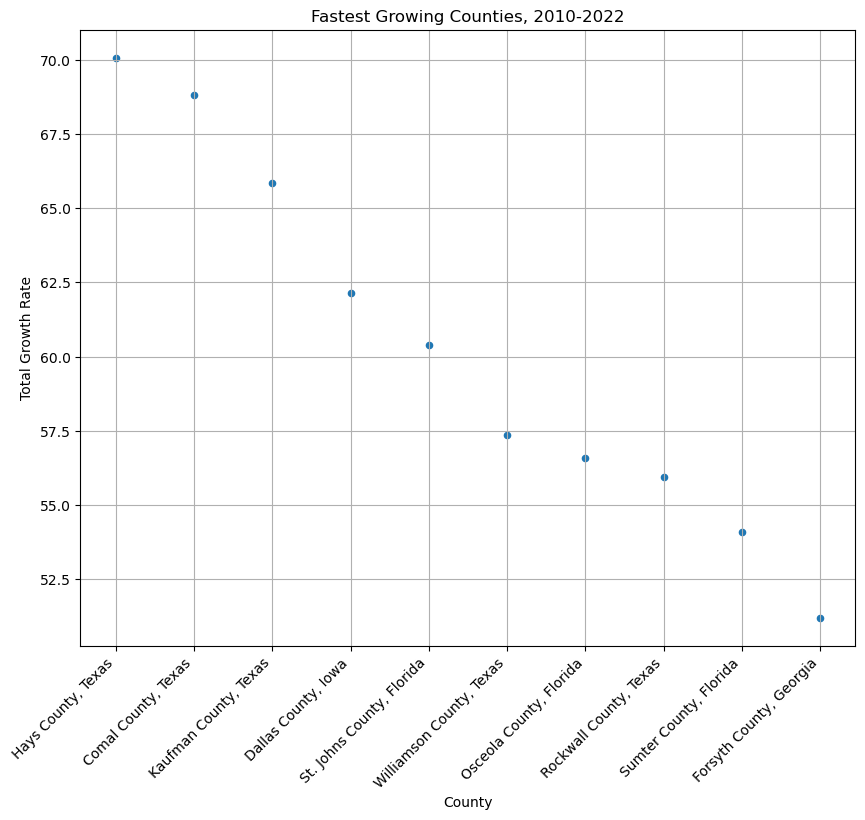

In [82]:
import matplotlib.pyplot as plt
import numpy as np

ax = top_10_df.plot(kind="scatter", x="County", y="Total Growth Rate", grid=True, figsize=(10,8),
                         title="Fastest Growing Counties, 2010-2022")

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [57]:
master_county_df.to_csv("C:/Users/Daniel Quinn/Desktop/Bootcamp/Project_1_Working_Copy/Census/7-17-24 Work/7-18-CSVs/2010_2022_pop_totals_CAGR.csv")

In [58]:
master_county_df.to_csv("C:/Users/Daniel Quinn/Desktop/Bootcamp/Project_1_Working_Copy/Census/7-17-24 Work/7-18-CSVs/2010_2022_pop_totals.csv")

In [59]:
#Create initial master df:

masters = [state_pop2010_df3, state_pop2011_df3, state_pop2012_df3, 
                    state_pop2013_df3, state_pop2014_df3, state_pop2015_df3, 
                    state_pop2016_df3, state_pop2017_df3, state_pop2018_df3, 
                    state_pop2019_df3, county2020_query_df3, state_pop2021_df3, state_pop2022_df3]

# Rename the Population col:

for i, df in enumerate(masters):
    df = df.rename(columns={'Population': f'Pop{i+1}'})
    masters[i] = df[['County', f'Pop{i+1}']]  # Keep only 'name' and renamed population column

# Start with the first DataFrame
master_county_df = masters[0]

# Merged each subsequent DataFrame into the master DataFrame
for df in masters[1:]:
    master_county_df = pd.merge(master_county_df, df, on="County")

master_county_df2 = master_county_df.rename(columns={"Pop1": "2010", "Pop2": "2011", "Pop3": "2012",
                                                     "Pop4": "2013", "Pop5": "2014", "Pop6": "2015",
                                                     "Pop7": "2016", "Pop8": "2017", "Pop9": "2018",
                                                     "Pop10": "2019", "Pop11": "2020", "Pop12": "2021",
                                                     "Pop13": "2022"})

master_county_df3 = master_county_df2[['County', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]
master_county_df3


,County,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Baldwin County, Alabama",183195,186717,190790,195540,200111,203709,208563,212628,218022,223234,231767,239294,246435
1,"Calhoun County, Alabama",118510,117797,117296,116736,115916,115620,114611,114728,114277,113605,116441,115972,115788
2,"Cullman County, Alabama",80459,80536,80440,80811,81289,82005,82471,82755,83442,83768,87866,89496,90665
3,"DeKalb County, Alabama",71151,71375,71080,71013,71065,71130,70900,71617,71385,71513,71608,71813,71998
4,"Elmore County, Alabama",79549,80162,80629,80902,80977,81468,81799,81677,81887,81209,87977,89304,89563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,"Ponce Municipio, Puerto Rico",166164,163727,160322,157118,153540,149028,145278,140859,133191,131881,137491,135084,132138
795,"San Juan Municipio, Puerto Rico",395074,389714,382299,374682,365575,355074,347052,337288,320967,318441,342259,337300,334776
796,"Toa Alta Municipio, Puerto Rico",73954,75105,75434,75292,74837,74368,73980,73217,71094,72025,66852,67569,66041
797,"Toa Baja Municipio, Puerto Rico",89513,88799,87582,85971,84165,82065,80207,78092,74623,74271,75293,74368,72783


In [60]:
master_county_df3.astype({"2010":int, "2011":int, "2012":int, "2013":int, "2014":int, "2015":int, "2016":int, "2017":int,
                           "2018":int, "2019":int, "2020":int, "2021":int, "2022":int})

,County,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Baldwin County, Alabama",183195,186717,190790,195540,200111,203709,208563,212628,218022,223234,231767,239294,246435
1,"Calhoun County, Alabama",118510,117797,117296,116736,115916,115620,114611,114728,114277,113605,116441,115972,115788
2,"Cullman County, Alabama",80459,80536,80440,80811,81289,82005,82471,82755,83442,83768,87866,89496,90665
3,"DeKalb County, Alabama",71151,71375,71080,71013,71065,71130,70900,71617,71385,71513,71608,71813,71998
4,"Elmore County, Alabama",79549,80162,80629,80902,80977,81468,81799,81677,81887,81209,87977,89304,89563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,"Ponce Municipio, Puerto Rico",166164,163727,160322,157118,153540,149028,145278,140859,133191,131881,137491,135084,132138
795,"San Juan Municipio, Puerto Rico",395074,389714,382299,374682,365575,355074,347052,337288,320967,318441,342259,337300,334776
796,"Toa Alta Municipio, Puerto Rico",73954,75105,75434,75292,74837,74368,73980,73217,71094,72025,66852,67569,66041
797,"Toa Baja Municipio, Puerto Rico",89513,88799,87582,85971,84165,82065,80207,78092,74623,74271,75293,74368,72783


In [61]:
#CAGR / Total Growth addition - FINAL DF:

master_county_df.to_csv("C:/Users/Daniel Quinn/Desktop/Bootcamp/Project_1_Working_Copy/Census/7-17-24 Work/2010-2022-master_county_df.csv")

final_county_df = pd.read_csv("C:/Users/Daniel Quinn/Desktop/Bootcamp/Project_1_Working_Copy/Census/7-17-24 Work/2010-2022-master_county_df.csv")

final_county_df = pd.DataFrame(final_county_df)

final_county_df2 = final_county_df[["County", "2010", "2011", "2012",
                                "2013", "2014", "2015", "2016", "2017",
                                "2018", "2019", "2020", "2021", "2022"]]

final_county_df2['Total % Change'] = final_county_df2['2022'] / final_county_df2['2010']-1

def calculate_cagr(start_value, end_value, periods):
    return (end_value / start_value) ** (1 / periods) - 1

#Calculate the number of periods
start_year = 2010
end_year = 2022
periods = end_year - start_year

# Calculate CAGR for each row
final_county_df2['CAGR'] = final_county_df2.apply(lambda row: calculate_cagr(row[str(start_year)], row[str(end_year)], periods), axis=1)
final_county_df2


KeyError: "['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'] not in index"